In [1]:
import pandas as pd
import numpy as np 
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')

In [2]:
path=r'D:\python data\news_classification'

In [3]:
#kaggle.api.dataset_download_files('banuprakashv/news-articles-classification-dataset-for-nlp-and-ml',path',unzip=True,quiet=False)

In [4]:
df=pd.DataFrame()
for file in os.listdir(path):
    data=pd.read_csv(os.path.join(path,file))
    df=pd.concat([df,data],ignore_index=True)
    print(file)

business_data.csv
education_data.csv
entertainment_data.csv
sports_data.csv
technology_data.csv


In [5]:
df

,headlines,description,content,url,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
...,...,...,...,...,...
9995,Vivaldi’s privacy and customisability-focused ...,The Vivaldi browser is now available on iOS an...,"Vivaldi, the free browser founded by Opera co-...",https://indianexpress.com/article/technology/t...,technology
9996,"From Meta Quest 3 to Ray Ban Smart Glasses, he...",The future is here. Meta unveils its next-gen ...,"Meta has concluded its Connect 2023 event, unv...",https://indianexpress.com/article/technology/t...,technology
9997,Samsung Galaxy S24 rumoured to launch on Janua...,Samsung might shift the launch window of its u...,Samsung has been launching its Galaxy S series...,https://indianexpress.com/article/technology/m...,technology
9998,"‘We continuously iterate… building prototypes,...",Dyson's success in floorcare tech lies in inno...,"“When things don’t go as planned, we return to...",https://indianexpress.com/article/technology/t...,technology


In [6]:
df=df[['content','category']].sample(frac=1,random_state=12).reset_index(drop=True)

In [7]:
df

,content,category
0,"Actor Rajesh Kumar, best known for playing Ros...",entertainment
1,Written by Kashmir Hill\nWhen Jennifer Watkins...,technology
2,"The Indian Institute of Technology, Madras (II...",education
3,"For all you fans of bright, eye-catching red, ...",technology
4,Having bested Australia in the first two tests...,sports
...,...,...
9995,"NIRF 2023: Nine educational institutes, includ...",education
9996,Olympic gold medal winning javelin thrower Nee...,sports
9997,NEET UG 2023 Counselling: The Medical Counsell...,education
9998,The Ace 2 Pro is the OnePlus’s first smartphon...,technology


In [8]:
cat_dict={i:cat for i,cat in enumerate(df['category'].unique())}
df['category']=df['category'].map({v:k for k,v in cat_dict.items()})

In [9]:
split_index=int(len(df)*0.8)

train_df=df.iloc[:split_index]
test_df=df.iloc[split_index:]

<Axes: ylabel='count'>

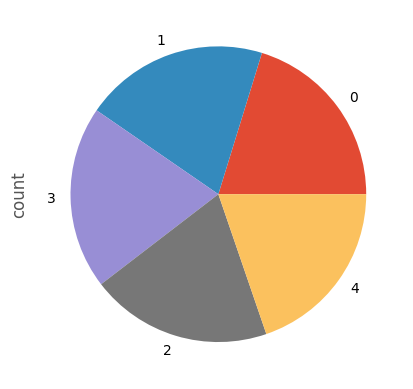

In [10]:
train_df['category'].value_counts().plot.pie()

# Feature engineering 

Count tokens and select most frequently used ones as predictors

In [11]:
import nltk

tokenizer=nltk.RegexpTokenizer(r'\w+')
lemmatizer=nltk.stem.WordNetLemmatizer()
stopwords=nltk.corpus.stopwords.words('english')

In [12]:
def text_to_tokens(text):
    tokenized=tokenizer.tokenize(text)
    lower_tokens=[t.lower() for t in tokenized]
    lemmatized=[lemmatizer.lemmatize(t) for t in lower_tokens]
    tokens=[t for t in lemmatized if t not in stopwords]
    return tokens

In [13]:
token_count={}
for i,text in enumerate(train_df['content']):
    text_as_tokens=text_to_tokens(text)
    for token in text_as_tokens:
        if token not in token_count:
            token_count[token]=1
        else:
            token_count[token]+=1

    if i%100==0:
        print(i,end='\r')

In [14]:
dict(sorted(token_count.items(),key=lambda item:item[1],reverse=True))

{'wa': 9333,
 'said': 9099,
 'ha': 8762,
 'india': 7555,
 'also': 6389,
 'year': 6310,
 'per': 5582,
 'advertisement': 4571,
 'already': 4544,
 'cent': 4456,
 'sign': 4217,
 'r': 4197,
 'story': 4144,
 'indian': 3935,
 'register': 3801,
 'world': 3643,
 'read': 3545,
 'time': 3486,
 'one': 3422,
 'first': 3344,
 'new': 3343,
 '1': 3288,
 'film': 3280,
 '2023': 3231,
 'account': 3221,
 'continue': 3167,
 'day': 3048,
 'news': 3046,
 'latest': 2877,
 'top': 2806,
 'last': 2805,
 'company': 2726,
 'get': 2703,
 'google': 2686,
 'free': 2643,
 'crore': 2643,
 'student': 2580,
 'update': 2562,
 'test': 2538,
 '2': 2509,
 'two': 2457,
 'like': 2393,
 'around': 2236,
 'would': 2218,
 'u': 2155,
 'month': 2146,
 'email': 2020,
 '3': 2018,
 'team': 2013,
 'market': 2004,
 'facebook': 1997,
 'game': 1835,
 'actor': 1805,
 'monthly': 1782,
 'express': 1777,
 'need': 1768,
 'subscriber': 1736,
 'article': 1734,
 'bank': 1703,
 '5': 1695,
 '2024': 1689,
 '10': 1644,
 'click': 1641,
 'limit': 1617,


In [15]:
features=sorted([k for k,v in token_count.items() if v>200])
features_dict={feature:i for i,feature in enumerate(features)}
features_dict

{'0': 0,
 '000': 1,
 '1': 2,
 '10': 3,
 '100': 4,
 '11': 5,
 '12': 6,
 '13': 7,
 '14': 8,
 '15': 9,
 '16': 10,
 '17': 11,
 '18': 12,
 '19': 13,
 '2': 14,
 '20': 15,
 '200': 16,
 '2017': 17,
 '2018': 18,
 '2019': 19,
 '2020': 20,
 '2021': 21,
 '2022': 22,
 '2023': 23,
 '2024': 24,
 '21': 25,
 '22': 26,
 '23': 27,
 '24': 28,
 '25': 29,
 '26': 30,
 '27': 31,
 '28': 32,
 '29': 33,
 '3': 34,
 '30': 35,
 '31': 36,
 '35': 37,
 '4': 38,
 '40': 39,
 '45': 40,
 '5': 41,
 '50': 42,
 '500': 43,
 '55': 44,
 '6': 45,
 '60': 46,
 '65': 47,
 '7': 48,
 '70': 49,
 '75': 50,
 '8': 51,
 '80': 52,
 '83': 53,
 '9': 54,
 '90': 55,
 'ability': 56,
 'able': 57,
 'ac': 58,
 'academic': 59,
 'access': 60,
 'according': 61,
 'account': 62,
 'across': 63,
 'act': 64,
 'action': 65,
 'activity': 66,
 'actor': 67,
 'adani': 68,
 'add': 69,
 'added': 70,
 'adding': 71,
 'additional': 72,
 'admission': 73,
 'advanced': 74,
 'advertisement': 75,
 'africa': 76,
 'age': 77,
 'agency': 78,
 'ago': 79,
 'ahead': 80,
 'ai':

In [16]:
def text_to_count_vector(text):
    count_vector=np.zeros(len(features))

    text_as_tokens=text_to_tokens(text)
    for token in text_as_tokens:
        if token not in features_dict:
            continue
        index=features_dict[token]
        count_vector[index]+=1
    return count_vector

In [17]:
def df_to_X_y(df):
  y = (df['category'].astype('category').cat.codes).to_numpy().astype(int)

  count_vectors = []

  for text in df['content']:
    count_vector = text_to_count_vector(text)
    count_vectors.append(count_vector)

  X = np.array(count_vectors).astype(int)

  return X, y

In [18]:
X_train, y_train = df_to_X_y(train_df)

X_test, y_test = df_to_X_y(test_df)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 1069), (8000,), (2000, 1069), (2000,))

# ML Model

In [19]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
model=XGBClassifier()

from sklearn.model_selection import learning_curve

def plot_learning_curve(model):
    train_sizes,train_scores,test_scores=learning_curve(
        X=X_train,
        y=y_train,
        estimator=model,
        train_sizes=np.linspace(0.1,1,10),
        cv=3,
        scoring='accuracy',
        verbose=1
    )
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('MAE')
    plt.title('Learning Curve for XGBoost Classifier')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(XGBClassifier()) #initial model

from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10],
            'learning_rate':[0.01,0.05,0.1,0.15]}

grid_search_cv=GridSearchCV(estimator=XGBClassifier(),
                         param_grid=param_grid,
                         scoring='accuracy',
                         cv=3,
                         verbose=10)

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

In [20]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [21]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [22]:
train_accuracy=metrics.accuracy_score(train_prediction,y_train)
test_accuracy=metrics.accuracy_score(test_prediction,y_test)
print(train_accuracy,test_accuracy)

1.0 0.968


In [23]:
print(classification_report(test_prediction,y_test))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       373
           1       0.95      0.91      0.93       404
           2       0.96      0.98      0.97       406
           3       0.99      0.98      0.99       404
           4       0.95      0.97      0.96       413

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



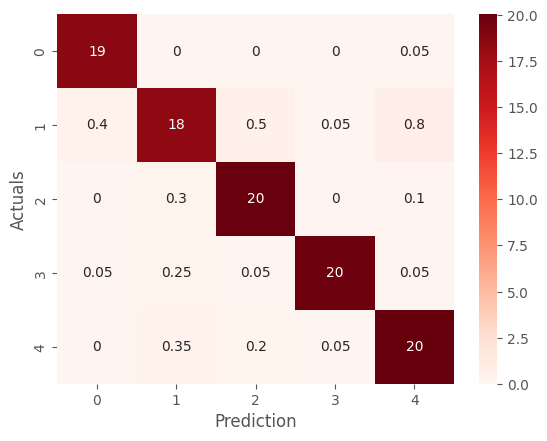

In [24]:
cm=metrics.confusion_matrix(test_prediction,y_test)
cm=cm/cm.sum()*100

sns.heatmap(cm,annot=True,cmap='Reds')
plt.xlabel('Prediction')
plt.ylabel('Actuals')
plt.show()